In [1]:
from yellowbrick.cluster import KElbowVisualizer
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Medha.Ch\Envs\tf_keras\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# read the image
image = cv2.imread("content_final.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

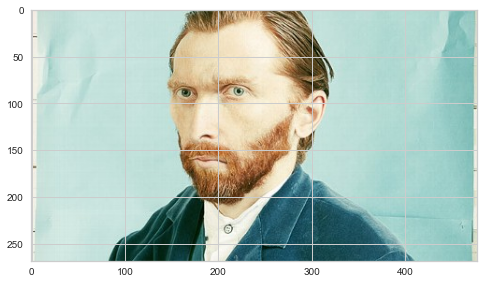

In [3]:
plt.imshow(image)
plt.show()

In [4]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [5]:
print(pixel_values.shape)

(128582, 3)


In [6]:
# defining stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [7]:
# number of clusters (K)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [8]:
# converting back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [9]:
# converting all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

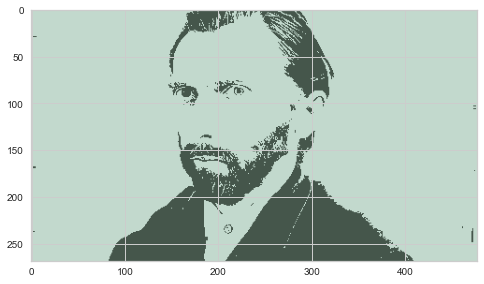

In [10]:
# reshapeing back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

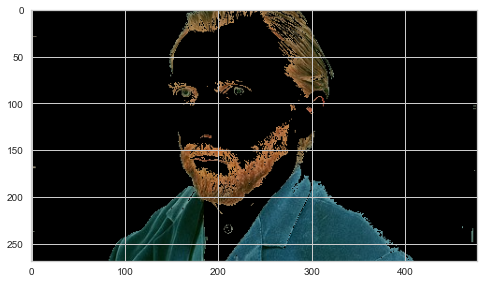

In [11]:
# disable only the cluster 1 (turning those pixels into black)
masked_image = np.copy(image)
# converting them to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disabled
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# converting back to the original shape
masked_image = masked_image.reshape(image.shape)
# displaying the image
plt.imshow(masked_image)
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

In [13]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [14]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [15]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [16]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

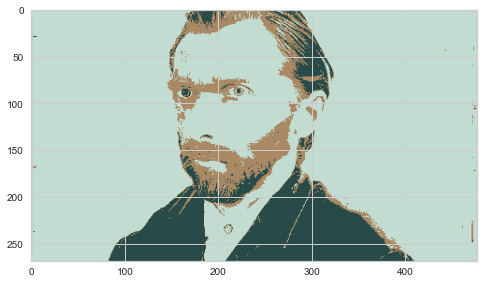

In [17]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()